### Problem Statement:

Build a regression model in order to predict the price of the cars based on 26 features provided in the dataset

### Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Reading the dataset

In [5]:
df=pd.read_csv('car_sales-1.csv',index_col=0)
df.head(5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [7]:
df.shape

(93, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


### Checking for null values:

In [9]:
df.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [10]:
#pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 27)

In [11]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Variables correlation with target variable:

In [14]:
cor=df.corr()

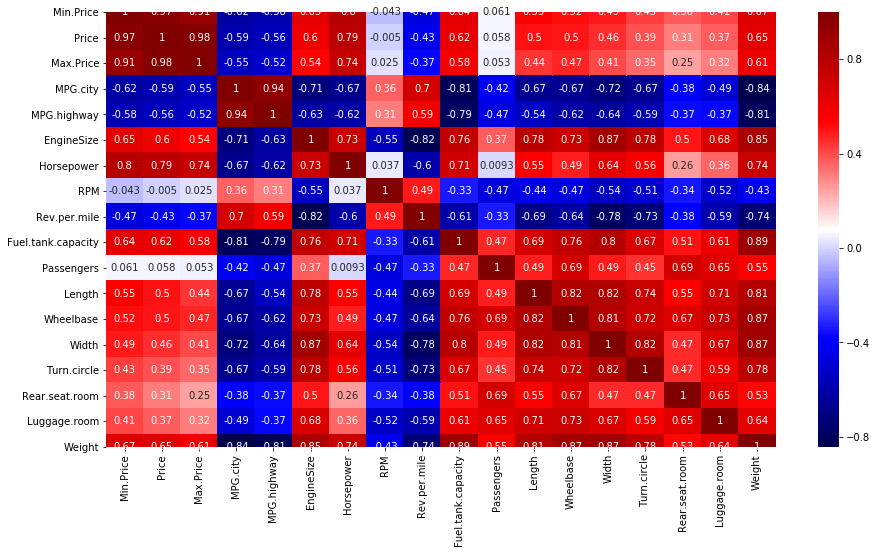

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(cor,annot=True,cmap='seismic')

In [16]:
cor_target = abs(cor["Price"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Min.Price             0.970601
Price                 1.000000
Max.Price             0.981580
MPG.city              0.594562
MPG.highway           0.560680
EngineSize            0.597425
Horsepower            0.788218
Fuel.tank.capacity    0.619480
Length                0.503628
Wheelbase             0.500864
Weight                0.647179
Name: Price, dtype: float64

In [17]:
def airbags(x):
    if x=='None':
        x=0
    elif x=='Driver only':
        x=1
    elif x=='Driver & Passenger':
        x=2
    return x
df.AirBags=df.AirBags.apply(airbags)

In [18]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,0,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,2,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,1,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,2,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,1,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [19]:
df.DriveTrain.value_counts()

Front    67
Rear     16
4WD      10
Name: DriveTrain, dtype: int64

In [20]:
def x(a):
    if a=='Front':
        a=0
    elif a=='Rear':
        a=1
    elif a=='4WD':
        a=2
    return a
df.DriveTrain=df.DriveTrain.apply(x)

In [21]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,1,0,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [22]:
round(pd.DataFrame(df.groupby('Manufacturer')['Price'].mean()),0)

,Price
Manufacturer,
Acura,25.0
Audi,33.0
BMW,30.0
Buick,22.0
Cadillac,37.0
Chevrolet,18.0
Chrylser,18.0
Chrysler,23.0
Dodge,16.0


In [24]:
df.Cylinders.value_counts()

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [25]:
df.Cylinders=df.Cylinders.replace('rotary',10)

In [26]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,1,0,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [27]:
df['Man.trans.avail'].value_counts()

Yes    61
No     32
Name: Man.trans.avail, dtype: int64

In [28]:
df[['Man.trans.avail','Price']].head(20)

,Man.trans.avail,Price
1,Yes,15.9
2,Yes,33.9
3,Yes,29.1
4,Yes,37.7
5,Yes,30.0
6,No,15.7
7,No,20.8
8,No,23.7
9,No,26.3
10,No,34.7


In [29]:
def a(x):
    if x=='Yes':
        x=0
    elif x=='No':
        x=1
    return x
df['Man.trans.avail']=df['Man.trans.avail'].apply(a)

In [30]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,1.8,140,6300,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,3.2,200,5500,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,1,0,6,2.8,172,5500,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,2.8,172,5500,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,3.5,208,5700,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [32]:
mfg = pd.DataFrame(df.groupby('Manufacturer')['Price'].mean()) 
mfg.rename(columns ={"Price": "brand_price"}, inplace = True)
print(mfg.head(10))
df = pd.merge(mfg,df,on='Manufacturer')

              brand_price
Manufacturer             
Acura             24.9000
Audi              33.4000
BMW               30.0000
Buick             21.6250
Cadillac          37.4000
Chevrolet         18.1875
Chrylser          18.4000
Chrysler          22.6500
Dodge             15.7000
Eagle             15.7500


In [33]:
df.head()

,Manufacturer,brand_price_x,brand_price_y,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,24.9,24.9,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,...,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,24.9,24.9,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,...,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,33.4,33.4,90,Compact,25.9,29.1,32.3,20,26,1,0,6,...,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,33.4,33.4,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,...,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,30.0,30.0,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,...,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [37]:
#round(pd.DataFrame(df.groupby('Type')['Price'].mean()),0)
#Since it is not clear from average price,we will go for ohe instead of le

### Imputing null values

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [36]:
df.isnull().sum()

Manufacturer           0
brand_price_x          0
brand_price_y          0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [37]:
df['Rear.seat.room']=df.groupby('Type')['Rear.seat.room'].transform(lambda x:x.fillna(x.mean()))

In [38]:
df.head()

,Manufacturer,brand_price_x,brand_price_y,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,24.9,24.9,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,...,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,24.9,24.9,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,...,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,33.4,33.4,90,Compact,25.9,29.1,32.3,20,26,1,0,6,...,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,33.4,33.4,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,...,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,30.0,30.0,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,...,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [47]:
df.groupby('Type')['Luggage.room'].mean()

Type
Compact    13.687500
Large      18.272727
Midsize    15.000000
Small      12.000000
Sporty     11.416667
Van              NaN
Name: Luggage.room, dtype: float64

In [40]:
df.groupby('Type')['Passengers'].mean()

Type
Compact    5.062500
Large      6.000000
Midsize    5.136364
Small      4.619048
Sporty     3.714286
Van        7.111111
Name: Passengers, dtype: float64

Since there is null values for luggage room in whole van category,so we are checking it by the number of passengers in diff type

In [41]:
df['Luggage.room']=df['Luggage.room'].fillna(15)
#Since mean of midsize is 15

In [51]:
df.head()

,Manufacturer,brand_price,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,...,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,24.9,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,1.8,...,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,24.9,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,3.2,...,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,33.4,90,Compact,25.9,29.1,32.3,20,26,1,0,6,2.8,...,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,33.4,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,2.8,...,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,30.0,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,3.5,...,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [43]:
df.groupby('Origin')['Price'].mean()

Origin
USA        18.572917
non-USA    20.508889
Name: Price, dtype: float64

In [44]:
df['Origin']=pd.get_dummies(df['Origin'],drop_first=True)
#converted string to num

In [45]:
df.head()

,Manufacturer,brand_price_x,brand_price_y,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,24.9,24.9,Integra,Small,12.9,15.9,18.8,25,31,0,0,4,...,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,1,Acura Integra
1,Acura,24.9,24.9,Legend,Midsize,29.2,33.9,38.7,18,25,2,0,6,...,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,1,Acura Legend
2,Audi,33.4,33.4,90,Compact,25.9,29.1,32.3,20,26,1,0,6,...,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,1,Audi 90
3,Audi,33.4,33.4,100,Midsize,30.8,37.7,44.6,19,26,2,0,6,...,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,1,Audi 100
4,BMW,30.0,30.0,535i,Midsize,23.7,30.0,36.2,22,30,1,1,4,...,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,1,BMW 535i


In [46]:
df.drop(['Manufacturer','Model','Min.Price','Max.Price','Make'],axis=1,inplace=True)

In [47]:
df.head()

,brand_price_x,brand_price_y,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,24.9,24.9,Small,15.9,25,31,0,0,4,1.8,140,6300,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,1
1,24.9,24.9,Midsize,33.9,18,25,2,0,6,3.2,200,5500,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,1
2,33.4,33.4,Compact,29.1,20,26,1,0,6,2.8,172,5500,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,1
3,33.4,33.4,Midsize,37.7,19,26,2,0,6,2.8,172,5500,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,1
4,30.0,30.0,Midsize,30.0,22,30,1,1,4,3.5,208,5700,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,1


In [48]:
df.head()

,brand_price_x,brand_price_y,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,24.9,24.9,Small,15.9,25,31,0,0,4,1.8,140,6300,2890,0,13.2,5,177,102,68,37,26.5,11.0,2705,1
1,24.9,24.9,Midsize,33.9,18,25,2,0,6,3.2,200,5500,2335,0,18.0,5,195,115,71,38,30.0,15.0,3560,1
2,33.4,33.4,Compact,29.1,20,26,1,0,6,2.8,172,5500,2280,0,16.9,5,180,102,67,37,28.0,14.0,3375,1
3,33.4,33.4,Midsize,37.7,19,26,2,0,6,2.8,172,5500,2535,0,21.1,6,193,106,70,37,31.0,17.0,3405,1
4,30.0,30.0,Midsize,30.0,22,30,1,1,4,3.5,208,5700,2545,0,21.1,4,186,109,69,39,27.0,13.0,3640,1


In [50]:
df.Cylinders.value_counts()

4     49
6     31
8      7
3      3
5      2
10     1
Name: Cylinders, dtype: int64

In [51]:
df['Cylinders']=pd.to_numeric(df['Cylinders'],errors='coerce')

In [52]:
df.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [53]:
df.Cylinders.value_counts()

4     49
6     31
8      7
3      3
5      2
10     1
Name: Cylinders, dtype: int64

In [54]:
df=pd.get_dummies(df,drop_first=True)

In [55]:
df.head()

,brand_price_x,brand_price_y,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
0,24.9,24.9,15.9,25,31,0,0,4,1.8,140,6300,2890,0,...,177,102,68,37,26.5,11.0,2705,1,0,0,1,0,0
1,24.9,24.9,33.9,18,25,2,0,6,3.2,200,5500,2335,0,...,195,115,71,38,30.0,15.0,3560,1,0,1,0,0,0
2,33.4,33.4,29.1,20,26,1,0,6,2.8,172,5500,2280,0,...,180,102,67,37,28.0,14.0,3375,1,0,0,0,0,0
3,33.4,33.4,37.7,19,26,2,0,6,2.8,172,5500,2535,0,...,193,106,70,37,31.0,17.0,3405,1,0,1,0,0,0
4,30.0,30.0,30.0,22,30,1,1,4,3.5,208,5700,2545,0,...,186,109,69,39,27.0,13.0,3640,1,0,1,0,0,0


In [56]:
df.shape

(93, 28)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from tpot import TPOTRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

### Splitting Dataset into X and y:

In [58]:
X = df.drop('Price', axis=1)
y= df['Price']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [62]:
lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()

In [63]:
models=[]
models.append(('MVLR',lr))
models.append(('KNN',knn))
models.append(('RF',rf))
models.append(('SVR',svr))

In [64]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

MVLR: 4.468832 (0.133084)
KNN: 6.948077 (1.794335)
RF: 4.281898 (4.544127)
SVR: 9.196746 (5.964208)


In [74]:
# cleaned data backup in df1
df1 = df.copy()

### Standard Scaling:

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

## Raw linear regression model

In [77]:
X = df.drop('Price', axis=1)
y= df['Price']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 2.97233678e-01  2.97233678e-01  1.72869380e-01 -2.15137596e-01
  1.92244875e+00  6.86470419e-01  4.42986395e-01  3.36399055e-01
  6.66194721e-02 -4.28866209e-04  1.40631318e-04  5.80306241e-01
  1.62894282e-01 -1.21649289e+00  2.69293255e-04  1.14782373e-01
 -7.78899263e-01 -1.59974256e-01  2.42002851e-01  3.15887443e-01
 -2.56200207e-04  8.09735667e-01  3.29680227e+00  3.86441114e+00
 -7.84947657e-01  3.78587085e+00  5.24179507e+00]
Intercept: 36.33193271964646
R^2 score: 0.9193505726835587


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(65, 27)
(28, 27)
(28,)


In [79]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.9213385510985838
R^2 score for test: 0.7945558225501591


In [80]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     28.94
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           8.95e-27
Time:                        00:20:30   Log-Likelihood:                -225.31
No. Observations:                  93   AIC:                             504.6
Df Residuals:                      66   BIC:                             573.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 36.3319     23.283      1.560      0.123     -10.154      82.818
brand_price_x          0.2972      0.035      8.557      0.000       0.228       0.367
brand_price_y          0.2972      0.035      8.557      0.000       0.228       0.367
MPG.city               0.1729      0.276      0.627      0.533      -0.378       0.724
MPG.highway           -0.2151      0.268     -0.803      0.425      -0.750       0.320
AirBags                1.9224      0.718      2.676      0.009       0.488       3.357
DriveTrain             0.6865      0.655      1.048      0.299      -0.622       1.995
Cylinders              0.4430      0.642      0.690      0.492      -0.838       1.724
EngineSize             0.3364      1.267      0.266      0.791      -2.192       2.865
Horsepower             0.0666      0.030      2.241      0.028       0.007       0.126
RPM                   -0.0004      0.001     -0.290      0.773      -0.003       0.003
Rev.per.mile           0.0001      0.001      0.095      0.924      -0.003       0.003
Man.trans.avail        0.5803      1.376      0.422      0.675      -2.167       3.328
Fuel.tank.capacity     0.1629      0.311      0.524      0.602      -0.458       0.784
Passengers            -1.2165      1.015     -1.198      0.235      -3.243       0.810
Length                 0.0003      0.074      0.004      0.997      -0.148       0.148
Wheelbase              0.1148      0.174      0.662      0.511      -0.232       0.461
Width                 -0.7789      0.360     -2.162      0.034      -1.498      -0.060
Turn.circle           -0.1600      0.241     -0.665      0.509      -0.641       0.321
Rear.seat.room         0.2420      0.217      1.114      0.269      -0.192       0.676
Luggage.room           0.3159      0.219      1.443      0.154      -0.121       0.753
Weight                -0.0003      0.003     -0.078      0.938      -0.007       0.006
Origin                 0.8097      1.067      0.759      0.451      -1.321       2.941
Type_Large             3.2968      2.378      1.387      0.170      -1.450       8.044
Type_Midsize           3.8644      1.446      2.672      0.009       0.977       6.752
Type_Small            -0.7849      1.762     -0.446      0.657      -4.303       2.733
Type_Sporty            3.7859      1.988      1.904      0.061      -0.184       7.755
Type_Van               5.2418      3.464      1.513      0.135      -1.674      12.158
==============================================================================
Omnibus:                       41.476   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.797
Skew:                           1.459   Prob(JB):                     1.97e-30
Kurtosis:                       8.176   Cond. No.                     

## Assumptions For linear Regression

#### 1. Normality

In [81]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(136.79709608968838, 0.0)


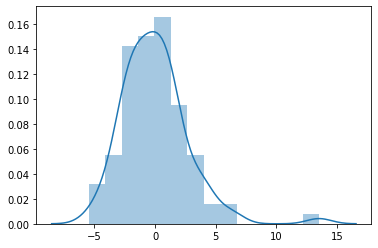

In [82]:
import seaborn as sns

sns.distplot(lin_reg.resid)

#### 2.Linearity

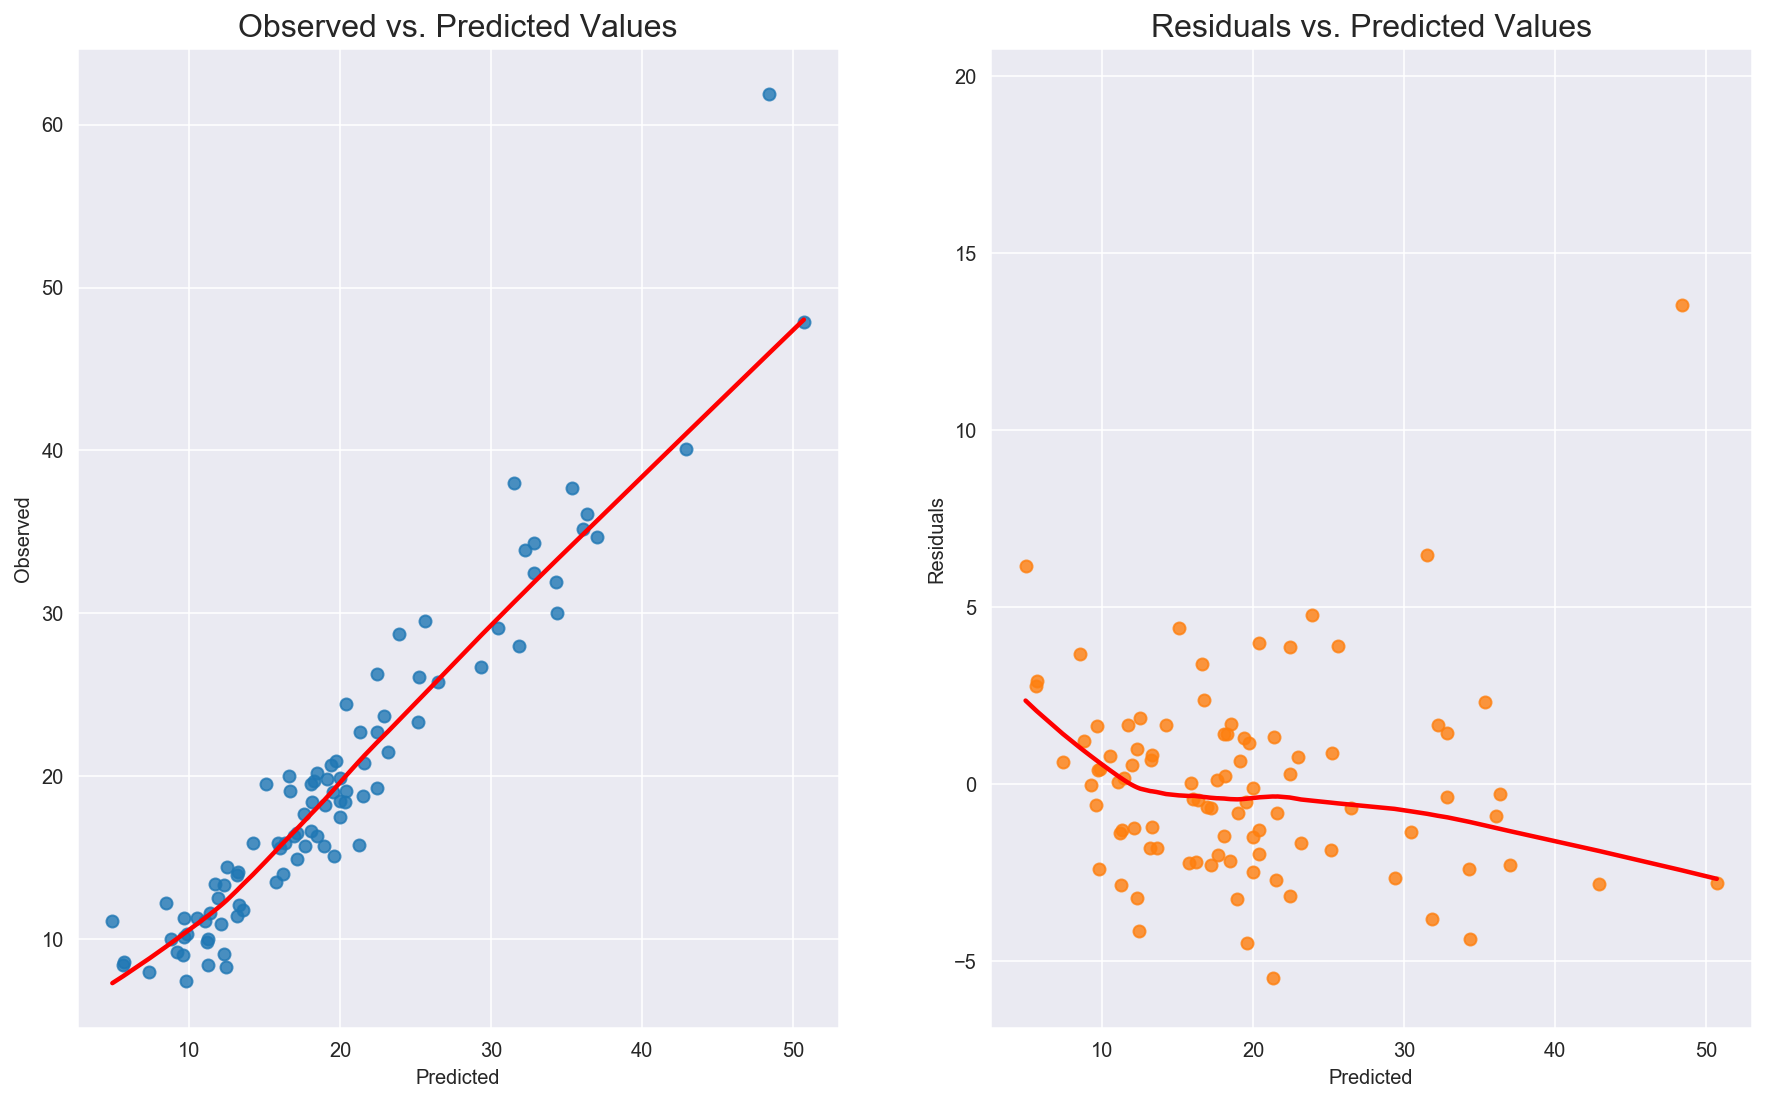

In [83]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

#### Rainbow Test

In [85]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.7050843931358275, 0.8356491009207248)

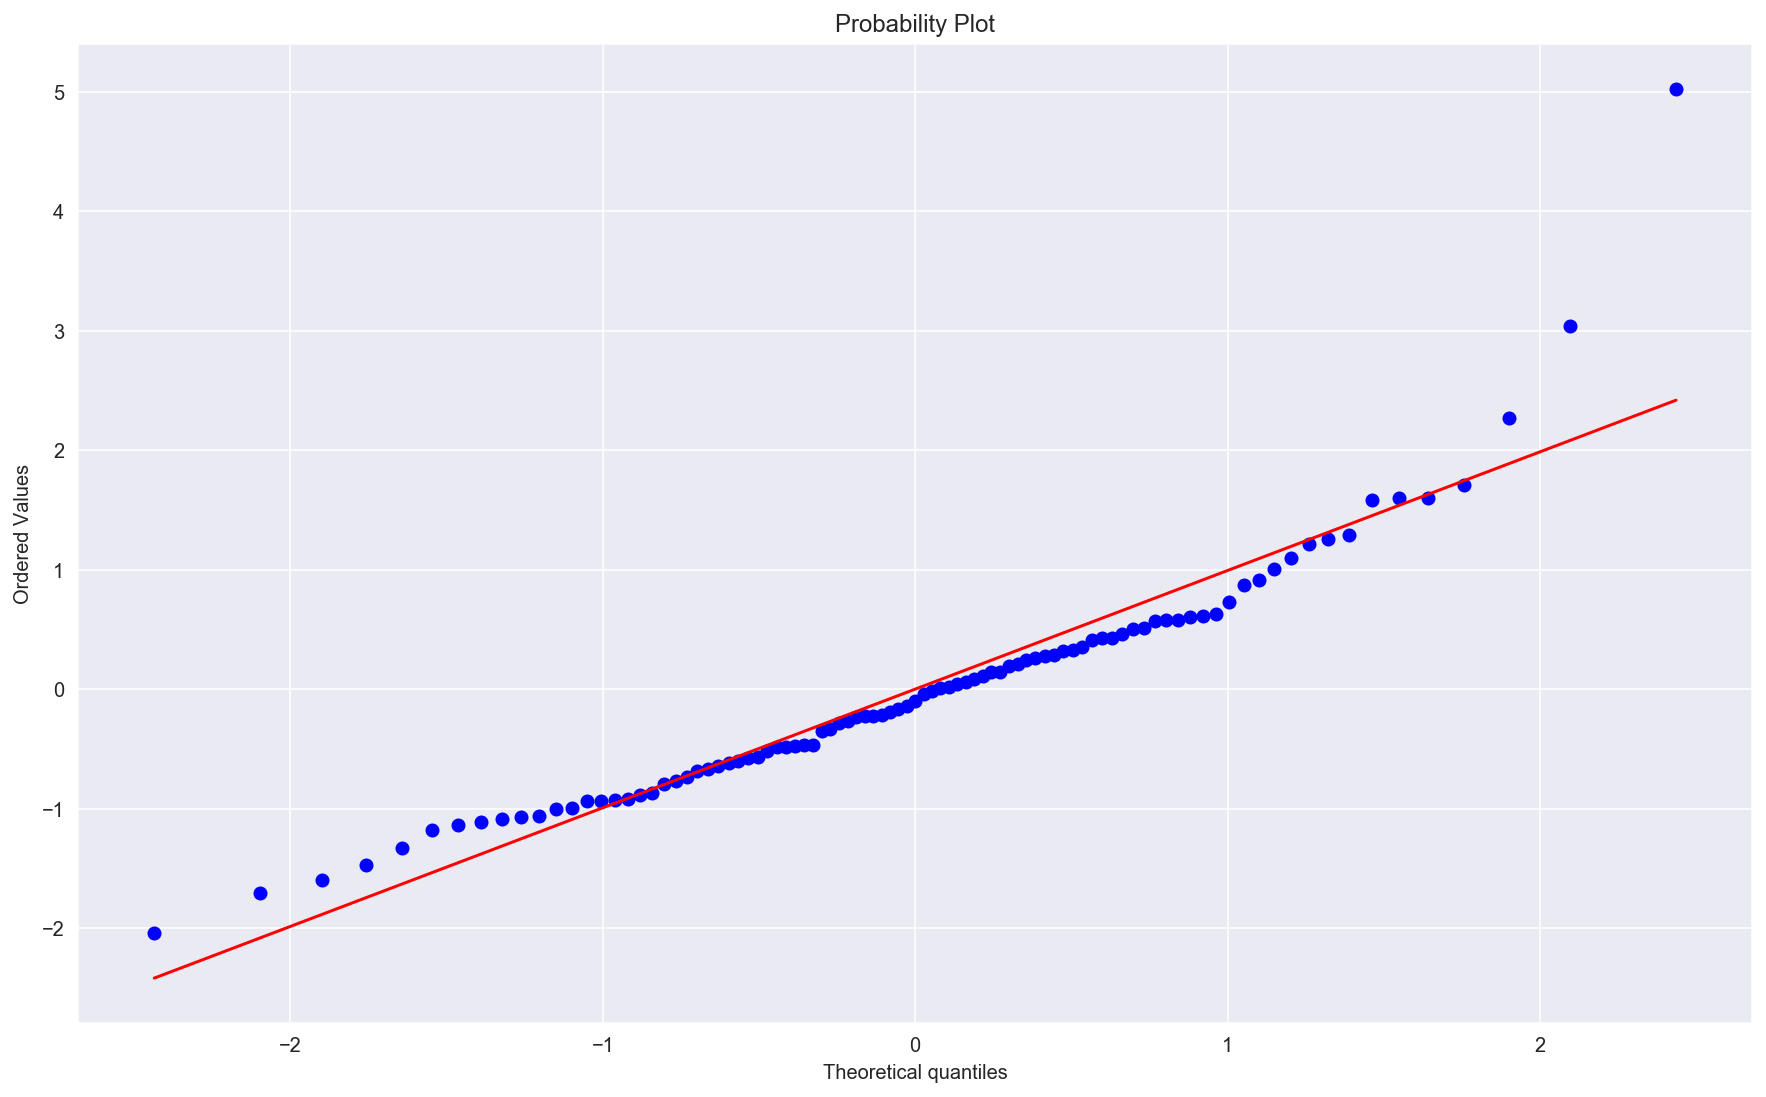

In [86]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [87]:
lin_reg.resid.mean()

-6.560104908516301e-13

### 3.Homoscedasticity

[('F statistic', 2.072847563063141), ('p-value', 0.05703115667347705)]

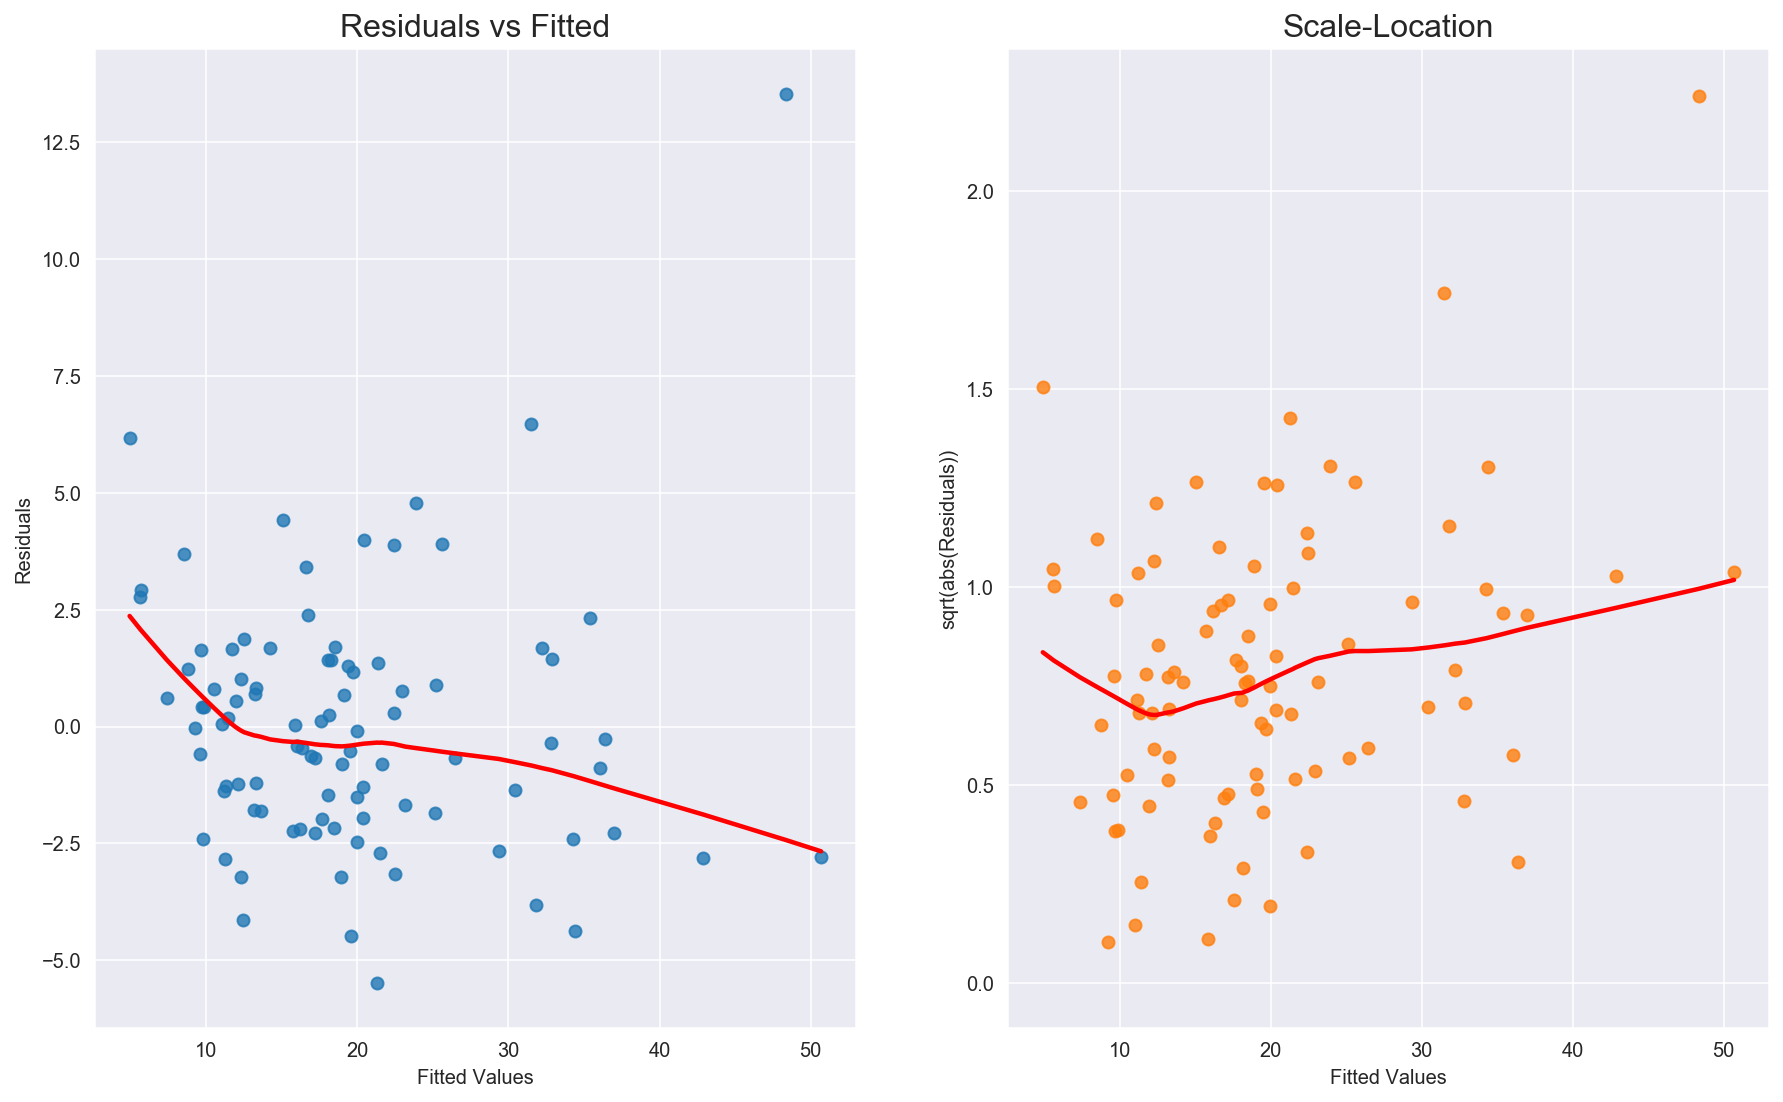

In [89]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

### 4. Autocorrelation

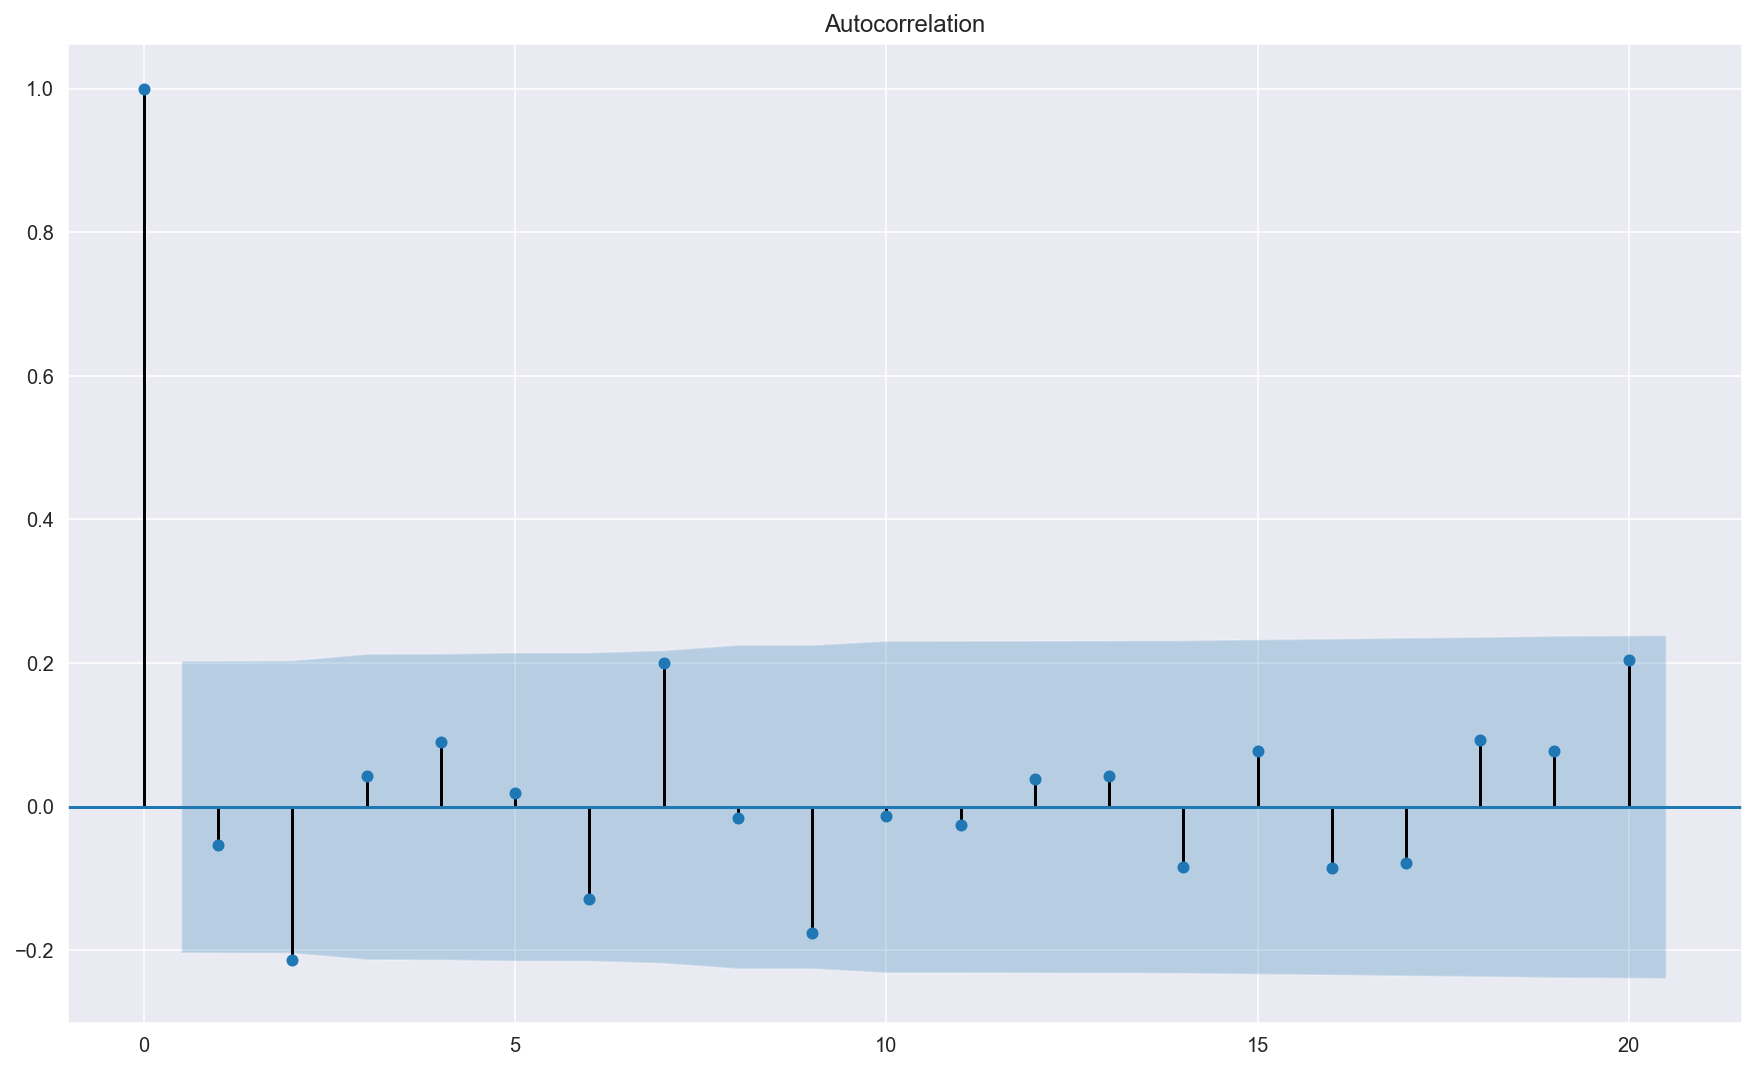

In [91]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=20,alpha=0.05)
acf.show()

### 5. Multicollinearity

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,brand_price_x,brand_price_y,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
vif,inf,inf,21.086875,17.892957,2.28842,1.722159,7.067617,15.140813,21.259209,6.835349,4.69728,3.789642,9.126647,9.755401,10.286414,12.281119,16.261522,5.280148,3.788143,3.381436,33.247161,2.522965,5.227113,3.348398,4.811542,4.48168,9.299159


In [94]:
cor=df.corr()

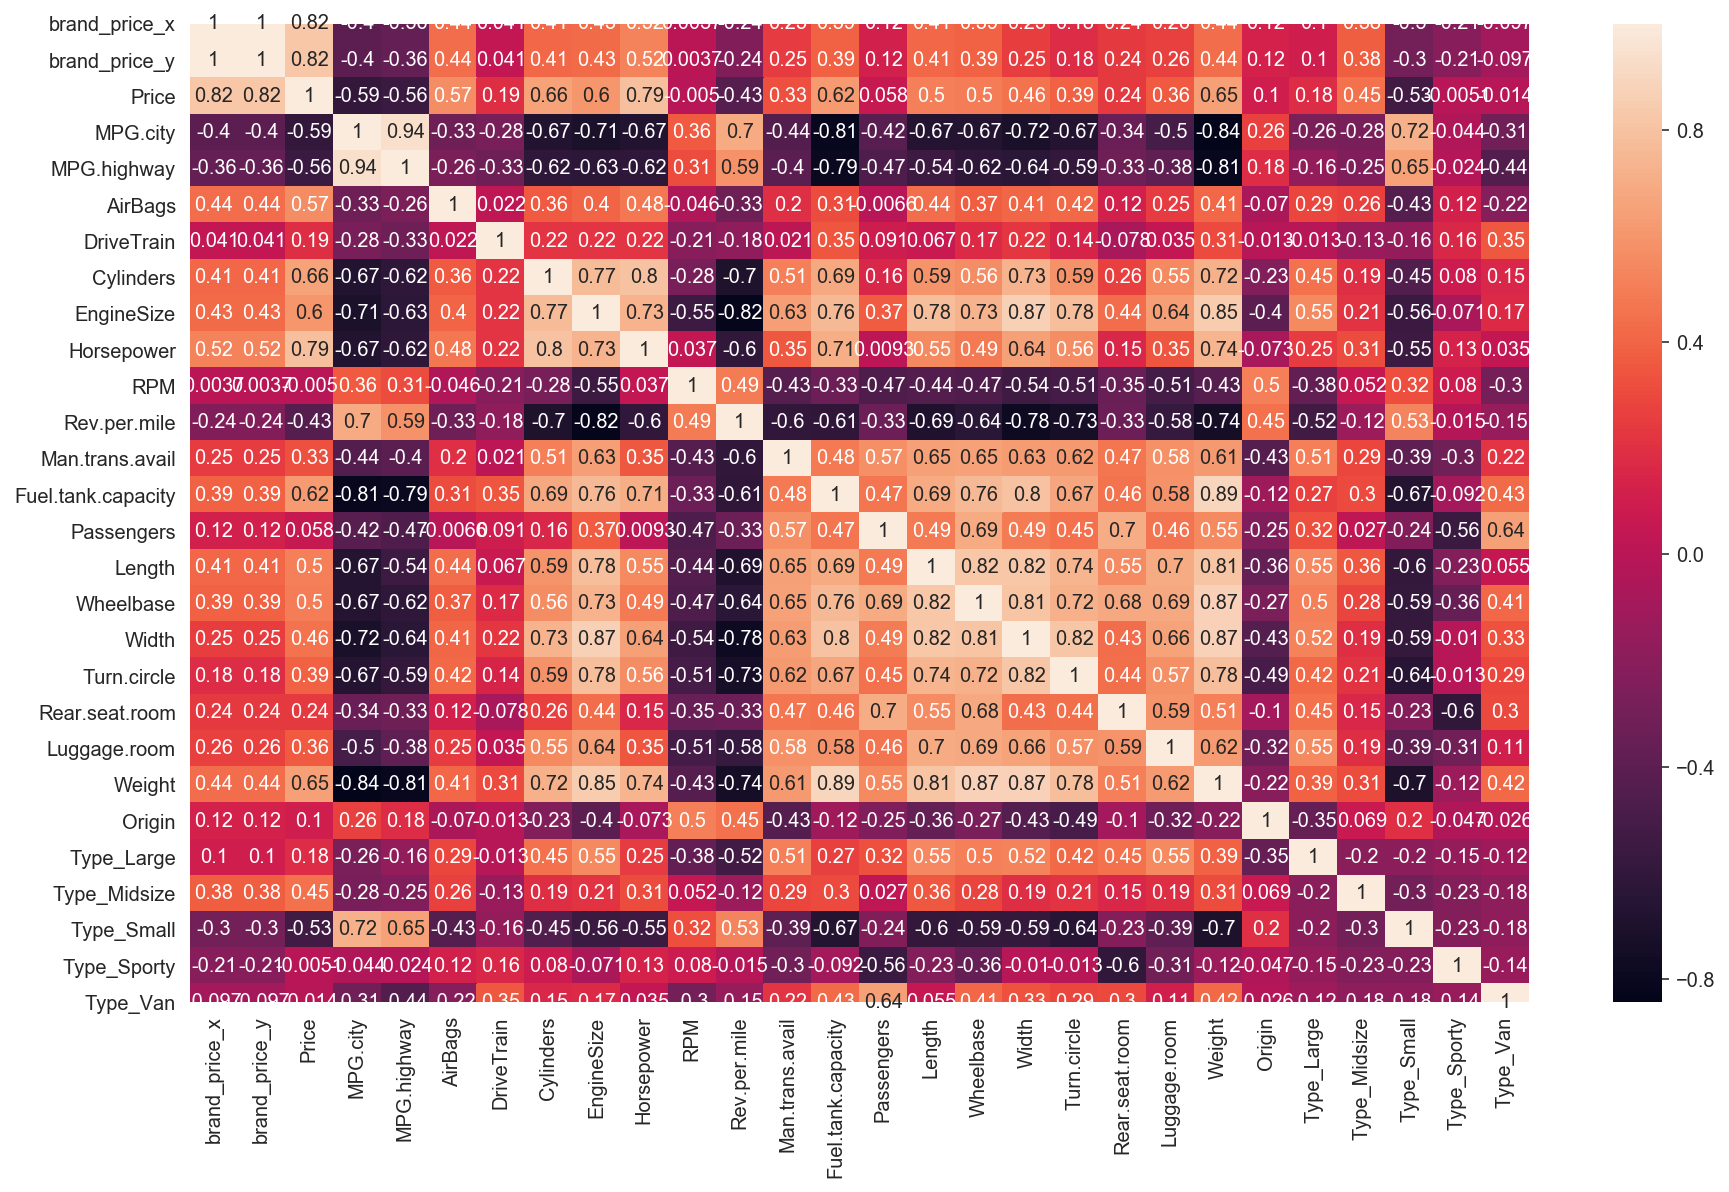

In [95]:
sns.heatmap(cor,annot=True)

In [96]:
cor=abs(cor['Price'])

In [97]:
main_features=cor[cor>0.5]
main_features

brand_price_x         0.823383
brand_price_y         0.823383
Price                 1.000000
MPG.city              0.594562
MPG.highway           0.560680
AirBags               0.565240
Cylinders             0.659902
EngineSize            0.597425
Horsepower            0.788218
Fuel.tank.capacity    0.619480
Length                0.503628
Wheelbase             0.500864
Weight                0.647179
Type_Small            0.525202
Name: Price, dtype: float64

### Transformation:

In [99]:
df2=df.copy()
df2 = df2.transform(lambda x: x**0.5)
df2.head()

,brand_price_x,brand_price_y,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
0,4.989990,4.989990,3.987480,5.000000,5.567764,0.000000,0.0,2.00000,1.341641,11.832160,79.372539,53.758720,0.0,...,13.304135,10.099505,8.246211,6.082763,5.147815,3.316625,52.009614,1.0,0.0,0.0,1.0,0.0,0.0
1,4.989990,4.989990,5.822371,4.242641,5.000000,1.414214,0.0,2.44949,1.788854,14.142136,74.161985,48.321838,0.0,...,13.964240,10.723805,8.426150,6.164414,5.477226,3.872983,59.665736,1.0,0.0,1.0,0.0,0.0,0.0
2,5.779273,5.779273,5.394442,4.472136,5.099020,1.000000,0.0,2.44949,1.673320,13.114877,74.161985,47.749346,0.0,...,13.416408,10.099505,8.185353,6.082763,5.291503,3.741657,58.094750,1.0,0.0,0.0,0.0,0.0,0.0
3,5.779273,5.779273,6.140033,4.358899,5.099020,1.414214,0.0,2.44949,1.673320,13.114877,74.161985,50.348784,0.0,...,13.892444,10.295630,8.366600,6.082763,5.567764,4.123106,58.352378,1.0,0.0,1.0,0.0,0.0,0.0
4,5.477226,5.477226,5.477226,4.690416,5.477226,1.000000,1.0,2.00000,1.870829,14.422205,75.498344,50.447993,0.0,...,13.638182,10.440307,8.306624,6.244998,5.196152,3.605551,60.332413,1.0,0.0,1.0,0.0,0.0,0.0


In [100]:
# Apply and check improvement by square root of data
X = df2.drop('Price',axis=1)
y = df2.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     32.99
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.85e-28
Time:                        00:22:21   Log-Likelihood:                -9.9589
No. Observations:                  93   AIC:                             73.92
Df Residuals:                      66   BIC:                             142.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2115      4.692      1.111      0.271      -4.157      14.580
brand_price_x          0.2716      0.034      7.963      0.000       0.204       0.340
brand_price_y          0.2716      0.034      7.963      0.000       0.204       0.340
MPG.city               0.0481      0.287      0.168      0.867      -0.525       0.621
MPG.highway           -0.0981      0.295     -0.333      0.740      -0.686       0.490
AirBags                0.2480      0.093      2.661      0.010       0.062       0.434
DriveTrain             0.1086      0.083      1.307      0.196      -0.057       0.275
Cylinders              0.3216      0.310      1.038      0.303      -0.297       0.940
EngineSize             0.1195      0.454      0.263      0.793      -0.787       1.026
Horsepower             0.1349      0.079      1.718      0.091      -0.022       0.292
RPM                    0.0047      0.022      0.213      0.832      -0.039       0.048
Rev.per.mile           0.0044      0.015      0.296      0.768      -0.025       0.034
Man.trans.avail        0.0328      0.135      0.244      0.808      -0.236       0.302
Fuel.tank.capacity     0.1199      0.255      0.471      0.639      -0.389       0.629
Passengers            -0.5439      0.399     -1.363      0.177      -1.341       0.253
Length                -0.0540      0.196     -0.276      0.784      -0.445       0.337
Wheelbase              0.1717      0.348      0.493      0.623      -0.523       0.866
Width                 -1.1074      0.585     -1.892      0.063      -2.276       0.061
Turn.circle           -0.1392      0.303     -0.459      0.648      -0.745       0.466
Rear.seat.room         0.3565      0.226      1.577      0.120      -0.095       0.808
Luggage.room           0.1133      0.158      0.716      0.476      -0.203       0.429
Weight                 0.0188      0.037      0.514      0.609      -0.054       0.092
Origin                 0.0954      0.105      0.909      0.367      -0.114       0.305
Type_Large             0.3599      0.232      1.551      0.126      -0.103       0.823
Type_Midsize           0.3805      0.144      2.634      0.010       0.092       0.669
Type_Small            -0.1913      0.178     -1.073      0.287      -0.547       0.165
Type_Sporty            0.3721      0.198      1.878      0.065      -0.023       0.768
Type_Van               0.4137      0.329      1.257      0.213      -0.244       1.071
==============================================================================
Omnibus:                       12.300   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.682
Skew:                           0.743   Prob(JB):                      0.00107
Kurtosis:                       4.151   Cond. No.                     

In [101]:
df3=df.copy()
df3=df3.transform(lambda x:x**2)
df3.head()

,brand_price_x,brand_price_y,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
0,620.01,620.01,252.81,625,961,0,0,16,3.24,19600,39690000,8352100,0,...,31329,10404,4624,1369,702.25,121.0,7317025,1,0,0,1,0,0
1,620.01,620.01,1149.21,324,625,4,0,36,10.24,40000,30250000,5452225,0,...,38025,13225,5041,1444,900.00,225.0,12673600,1,0,1,0,0,0
2,1115.56,1115.56,846.81,400,676,1,0,36,7.84,29584,30250000,5198400,0,...,32400,10404,4489,1369,784.00,196.0,11390625,1,0,0,0,0,0
3,1115.56,1115.56,1421.29,361,676,4,0,36,7.84,29584,30250000,6426225,0,...,37249,11236,4900,1369,961.00,289.0,11594025,1,0,1,0,0,0
4,900.00,900.00,900.00,484,900,1,1,16,12.25,43264,32490000,6477025,0,...,34596,11881,4761,1521,729.00,169.0,13249600,1,0,1,0,0,0


In [102]:
X =df3.drop('Price',axis=1)
y =df3.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     15.64
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           3.07e-19
Time:                        00:22:22   Log-Likelihood:                -625.13
No. Observations:                  93   AIC:                             1304.
Df Residuals:                      66   BIC:                             1373.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1318.1943    817.616      1.612      0.112    -314.228    2950.617
brand_price_x          0.3513      0.044      7.983      0.000       0.263       0.439
brand_price_y          0.3513      0.044      7.983      0.000       0.263       0.439
MPG.city               0.3346      0.355      0.943      0.349      -0.373       1.043
MPG.highway           -0.3480      0.308     -1.130      0.262      -0.963       0.267
AirBags               66.3574     24.498      2.709      0.009      17.445     115.270
DriveTrain             5.8680     26.016      0.226      0.822     -46.075      57.811
Cylinders             -0.6796      3.505     -0.194      0.847      -7.678       6.319
EngineSize             1.5861     11.721      0.135      0.893     -21.816      24.989
Horsepower             0.0133      0.005      2.720      0.008       0.004       0.023
RPM                -8.405e-06   8.71e-06     -0.965      0.338   -2.58e-05    8.99e-06
Rev.per.mile       -7.979e-06   1.99e-05     -0.400      0.690   -4.78e-05    3.18e-05
Man.trans.avail      104.7148    102.101      1.026      0.309     -99.136     308.565
Fuel.tank.capacity     0.5160      0.625      0.826      0.412      -0.732       1.764
Passengers            -6.7937      8.252     -0.823      0.413     -23.269       9.682
Length                 0.0044      0.015      0.291      0.772      -0.026       0.034
Wheelbase              0.0615      0.061      1.009      0.317      -0.060       0.183
Width                 -0.3594      0.190     -1.894      0.063      -0.738       0.019
Turn.circle           -0.1868      0.220     -0.849      0.399      -0.626       0.252
Rear.seat.room         0.0738      0.288      0.257      0.798      -0.501       0.648
Luggage.room           1.0221      0.573      1.783      0.079      -0.122       2.166
Weight             -3.844e-05   3.61e-05     -1.064      0.291      -0.000    3.37e-05
Origin                55.4701     79.605      0.697      0.488    -103.466     214.407
Type_Large           141.5190    178.827      0.791      0.432    -215.520     498.558
Type_Midsize         204.8775    106.551      1.923      0.059      -7.858     417.613
Type_Small            63.1897    122.209      0.517      0.607    -180.809     307.189
Type_Sporty          218.7167    140.168      1.560      0.123     -61.138     498.571
Type_Van             420.3037    272.960      1.540      0.128    -124.678     965.286
==============================================================================
Omnibus:                       96.016   Durbin-Watson:                   2.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1814.841
Skew:                           3.058   Prob(JB):                         0.00
Kurtosis:                      23.759   Cond. No.                     

In [103]:
### We can clearly see that after doing square transformation r2 value gets decreased and vice versa for square root

In [104]:
dfbox=df.copy()

In [105]:
dfbox.skew()

brand_price_x         1.886303
brand_price_y         1.886303
Price                 1.533082
MPG.city              1.704430
MPG.highway           1.229897
AirBags               0.299206
DriveTrain            1.500326
Cylinders             1.057316
EngineSize            0.859418
Horsepower            0.951728
RPM                  -0.258533
Rev.per.mile          0.281546
Man.trans.avail       0.667194
Fuel.tank.capacity    0.108146
Passengers            0.062517
Length               -0.090095
Wheelbase             0.113727
Width                 0.264027
Turn.circle          -0.133569
Rear.seat.room        0.101044
Luggage.room          0.103370
Weight               -0.143669
Origin                0.065613
Type_Large            2.402974
Type_Midsize          1.260229
Type_Small            1.333178
Type_Sporty           1.986689
Type_Van              2.772646
dtype: float64

In [106]:
l=[]
for i in dfbox.columns:
    if ((dfbox[i].skew()<0.1) or (dfbox[i].skew()>0.2) and (i!='Price')):
        l.append(i)
l

['brand_price_x',
 'brand_price_y',
 'MPG.city',
 'MPG.highway',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Man.trans.avail',
 'Passengers',
 'Length',
 'Width',
 'Turn.circle',
 'Weight',
 'Origin',
 'Type_Large',
 'Type_Midsize',
 'Type_Small',
 'Type_Sporty',
 'Type_Van']

In [107]:
for i in dfbox.columns:
    if i in l:
        dfbox[i]=list(st.boxcox(dfbox[i]+1)[0])
dfbox.skew()

brand_price_x        -0.037189
brand_price_y        -0.037189
Price                 1.533082
MPG.city              0.069507
MPG.highway          -0.009516
AirBags              -0.049771
DriveTrain            1.004348
Cylinders             0.102217
EngineSize            0.027709
Horsepower           -0.000437
RPM                  -0.042758
Rev.per.mile         -0.003707
Man.trans.avail       0.667194
Fuel.tank.capacity    0.108146
Passengers            0.059776
Length                0.012064
Wheelbase             0.113727
Width                 0.004234
Turn.circle          -0.035916
Rear.seat.room        0.101044
Luggage.room          0.103370
Weight               -0.074787
Origin                0.065613
Type_Large            2.402974
Type_Midsize          1.260229
Type_Small            1.333178
Type_Sporty           1.986689
Type_Van              2.772646
dtype: float64

In [108]:
X =dfbox.drop('Price',axis=1)
y =dfbox.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     15.52
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           3.76e-19
Time:                        00:22:30   Log-Likelihood:                -251.14
No. Observations:                  93   AIC:                             556.3
Df Residuals:                      66   BIC:                             624.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3861.4695   1800.250      2.145      0.036     267.154    7455.785
brand_price_x         61.1110     12.908      4.734      0.000      35.340      86.883
brand_price_y         61.1110     12.908      4.734      0.000      35.339      86.882
MPG.city           -1661.6795   1493.298     -1.113      0.270   -4643.146    1319.787
MPG.highway           71.6510    310.368      0.231      0.818    -548.019     691.321
AirBags                3.3791      1.469      2.301      0.025       0.447       6.312
DriveTrain            10.3545      5.398      1.918      0.059      -0.423      21.132
Cylinders             71.3199     86.746      0.822      0.414    -101.874     244.513
EngineSize             8.8165     12.987      0.679      0.500     -17.113      34.746
Horsepower             8.7910      5.814      1.512      0.135      -2.817      20.399
RPM                 1.192e-07   1.46e-06      0.082      0.935    -2.8e-06    3.03e-06
Rev.per.mile           0.0870      0.062      1.405      0.165      -0.037       0.211
Man.trans.avail        8.2599      5.846      1.413      0.162      -3.413      19.933
Fuel.tank.capacity    -0.1999      0.418     -0.478      0.634      -1.035       0.635
Passengers            -1.5631      1.251     -1.250      0.216      -4.060       0.934
Length                -0.0076      0.015     -0.505      0.615      -0.037       0.022
Wheelbase              0.1823      0.220      0.827      0.411      -0.258       0.622
Width              -2882.5642   1500.533     -1.921      0.059   -5878.474     113.346
Turn.circle           -0.0233      0.030     -0.782      0.437      -0.083       0.036
Rear.seat.room         0.4418      0.289      1.530      0.131      -0.135       1.018
Luggage.room           0.1545      0.286      0.540      0.591      -0.417       0.726
Weight                 0.0001      0.001      0.143      0.887      -0.001       0.002
Origin                 2.1654      2.234      0.969      0.336      -2.295       6.625
Type_Large            26.0323     37.178      0.700      0.486     -48.196     100.260
Type_Midsize          22.9510     11.404      2.013      0.048       0.182      45.720
Type_Small             2.8126     14.360      0.196      0.845     -25.859      31.484
Type_Sporty           33.6188     25.295      1.329      0.188     -16.884      84.122
Type_Van              37.2961     68.254      0.546      0.587     -98.977     173.570
==============================================================================
Omnibus:                       41.989   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.967
Skew:                           1.468   Prob(JB):                     1.49e-31
Kurtosis:                       8.293   Cond. No.                     

In [109]:
df4=df.copy()
df4=df4.transform(lambda x:x**0.4)
df4.head()

,brand_price_x,brand_price_y,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
0,3.618093,3.618093,3.023840,3.623898,3.949523,0.000000,0.0,1.741101,1.265054,7.218571,33.093006,24.230319,0.0,...,7.928469,6.359750,5.407588,4.239169,3.709355,2.609499,23.597550,1.0,0.0,0.0,1.0,0.0,0.0
1,3.618093,3.618093,4.093359,3.177672,3.623898,1.319508,0.0,2.047673,1.592429,8.325532,31.343326,22.249218,0.0,...,8.241644,6.672355,5.501782,4.284631,3.898060,2.954177,26.337831,1.0,0.0,1.0,0.0,0.0,0.0
2,4.069102,4.069102,3.850855,3.314454,3.681199,1.000000,0.0,2.047673,1.509605,7.838110,31.343326,22.038089,0.0,...,7.981950,6.359750,5.375637,4.239169,3.791955,2.873765,25.781579,1.0,0.0,0.0,0.0,0.0,0.0
3,4.069102,4.069102,4.271069,3.247143,3.681199,1.319508,0.0,2.047673,1.509605,7.838110,31.343326,22.992764,0.0,...,8.207727,6.458361,5.470654,4.239169,3.949523,3.105844,25.873003,1.0,0.0,1.0,0.0,0.0,0.0
4,3.898060,3.898060,3.898060,3.443254,3.898060,1.000000,1.0,1.741101,1.650544,8.457175,31.794349,23.029002,0.0,...,8.087330,6.530863,5.439258,4.329381,3.737193,2.789827,26.572998,1.0,0.0,1.0,0.0,0.0,0.0


In [110]:
X =df4.drop('Price',axis=1)
y =df4.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     33.36
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.33e-28
Time:                        00:22:32   Log-Likelihood:                 39.561
No. Observations:                  93   AIC:                            -25.12
Df Residuals:                      66   BIC:                             43.26
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.4581      3.446      1.003      0.319      -3.423      10.339
brand_price_x          0.2661      0.034      7.776      0.000       0.198       0.334
brand_price_y          0.2661      0.034      7.776      0.000       0.198       0.334
MPG.city               0.0161      0.293      0.055      0.956      -0.569       0.601
MPG.highway           -0.0690      0.305     -0.226      0.822      -0.677       0.539
AirBags                0.1521      0.057      2.681      0.009       0.039       0.265
DriveTrain             0.0674      0.051      1.323      0.190      -0.034       0.169
Cylinders              0.2886      0.270      1.068      0.289      -0.251       0.828
EngineSize             0.0908      0.371      0.245      0.807      -0.650       0.831
Horsepower             0.1559      0.095      1.633      0.107      -0.035       0.346
RPM                    0.0113      0.038      0.298      0.766      -0.064       0.087
Rev.per.mile           0.0074      0.024      0.311      0.757      -0.040       0.055
Man.trans.avail        0.0183      0.079      0.233      0.817      -0.139       0.176
Fuel.tank.capacity     0.1176      0.248      0.474      0.637      -0.377       0.612
Passengers            -0.4597      0.334     -1.375      0.174      -1.127       0.208
Length                -0.0782      0.241     -0.324      0.747      -0.559       0.403
Wheelbase              0.1978      0.406      0.487      0.628      -0.613       1.008
Width                 -1.1826      0.654     -1.808      0.075      -2.489       0.124
Turn.circle           -0.1349      0.322     -0.419      0.677      -0.778       0.508
Rear.seat.room         0.3819      0.232      1.649      0.104      -0.080       0.844
Luggage.room           0.0808      0.150      0.538      0.592      -0.219       0.381
Weight                 0.0360      0.060      0.602      0.549      -0.083       0.155
Origin                 0.0592      0.062      0.959      0.341      -0.064       0.182
Type_Large             0.2110      0.136      1.550      0.126      -0.061       0.483
Type_Midsize           0.2197      0.085      2.582      0.012       0.050       0.390
Type_Small            -0.1246      0.105     -1.188      0.239      -0.334       0.085
Type_Sporty            0.2168      0.116      1.863      0.067      -0.016       0.449
Type_Van               0.2279      0.192      1.190      0.238      -0.155       0.610
==============================================================================
Omnibus:                        8.837   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.616
Skew:                           0.642   Prob(JB):                       0.0135
Kurtosis:                       3.758   Cond. No.                     

In [111]:
X =df2.drop('Price',axis=1)
y =df2.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     32.99
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.85e-28
Time:                        00:22:32   Log-Likelihood:                -9.9589
No. Observations:                  93   AIC:                             73.92
Df Residuals:                      66   BIC:                             142.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2115      4.692      1.111      0.271      -4.157      14.580
brand_price_x          0.2716      0.034      7.963      0.000       0.204       0.340
brand_price_y          0.2716      0.034      7.963      0.000       0.204       0.340
MPG.city               0.0481      0.287      0.168      0.867      -0.525       0.621
MPG.highway           -0.0981      0.295     -0.333      0.740      -0.686       0.490
AirBags                0.2480      0.093      2.661      0.010       0.062       0.434
DriveTrain             0.1086      0.083      1.307      0.196      -0.057       0.275
Cylinders              0.3216      0.310      1.038      0.303      -0.297       0.940
EngineSize             0.1195      0.454      0.263      0.793      -0.787       1.026
Horsepower             0.1349      0.079      1.718      0.091      -0.022       0.292
RPM                    0.0047      0.022      0.213      0.832      -0.039       0.048
Rev.per.mile           0.0044      0.015      0.296      0.768      -0.025       0.034
Man.trans.avail        0.0328      0.135      0.244      0.808      -0.236       0.302
Fuel.tank.capacity     0.1199      0.255      0.471      0.639      -0.389       0.629
Passengers            -0.5439      0.399     -1.363      0.177      -1.341       0.253
Length                -0.0540      0.196     -0.276      0.784      -0.445       0.337
Wheelbase              0.1717      0.348      0.493      0.623      -0.523       0.866
Width                 -1.1074      0.585     -1.892      0.063      -2.276       0.061
Turn.circle           -0.1392      0.303     -0.459      0.648      -0.745       0.466
Rear.seat.room         0.3565      0.226      1.577      0.120      -0.095       0.808
Luggage.room           0.1133      0.158      0.716      0.476      -0.203       0.429
Weight                 0.0188      0.037      0.514      0.609      -0.054       0.092
Origin                 0.0954      0.105      0.909      0.367      -0.114       0.305
Type_Large             0.3599      0.232      1.551      0.126      -0.103       0.823
Type_Midsize           0.3805      0.144      2.634      0.010       0.092       0.669
Type_Small            -0.1913      0.178     -1.073      0.287      -0.547       0.165
Type_Sporty            0.3721      0.198      1.878      0.065      -0.023       0.768
Type_Van               0.4137      0.329      1.257      0.213      -0.244       1.071
==============================================================================
Omnibus:                       12.300   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.682
Skew:                           0.743   Prob(JB):                      0.00107
Kurtosis:                       4.151   Cond. No.                     

In [112]:
df5=df.copy()
df5=df5.transform(lambda x:x**0.01)
df5.head()

,brand_price_x,brand_price_y,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
0,1.032671,1.032671,1.028049,1.032712,1.034936,0.000000,0.0,1.013959,1.005895,1.050658,1.091424,1.082951,0.0,...,1.053125,1.047336,1.043098,1.036769,1.033314,1.024269,1.082235,1.0,0.0,0.0,1.0,0.0,0.0
1,1.032671,1.032671,1.035862,1.029325,1.032712,1.006956,0.0,1.018079,1.011699,1.054412,1.089943,1.080645,0.0,...,1.054145,1.048593,1.043548,1.037046,1.034597,1.027451,1.085212,1.0,0.0,1.0,0.0,0.0,0.0
2,1.035708,1.035708,1.034282,1.030411,1.033118,1.000000,0.0,1.018079,1.010349,1.052823,1.089943,1.080387,0.0,...,1.053302,1.047336,1.042943,1.036769,1.033883,1.026742,1.084633,1.0,0.0,0.0,0.0,0.0,0.0
3,1.035708,1.035708,1.036963,1.029882,1.033118,1.006956,0.0,1.018079,1.010349,1.052823,1.089943,1.081533,0.0,...,1.054036,1.047739,1.043400,1.036769,1.034936,1.028737,1.084729,1.0,0.0,1.0,0.0,0.0,0.0
4,1.034597,1.034597,1.034597,1.031393,1.034597,1.000000,1.0,1.013959,1.012606,1.054826,1.090332,1.081576,0.0,...,1.053647,1.048031,1.043250,1.037315,1.033508,1.025981,1.085453,1.0,0.0,1.0,0.0,0.0,0.0


In [113]:
X =df5.drop('Price',axis=1)
y =df5.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     33.73
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           9.55e-29
Time:                        00:22:33   Log-Likelihood:                 491.06
No. Observations:                  93   AIC:                            -928.1
Df Residuals:                      66   BIC:                            -859.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6005      1.062      0.565      0.574      -1.521       2.722
brand_price_x          0.2434      0.035      6.934      0.000       0.173       0.314
brand_price_y          0.2434      0.035      6.934      0.000       0.173       0.314
MPG.city              -0.1366      0.326     -0.420      0.676      -0.787       0.513
MPG.highway            0.0641      0.360      0.178      0.859      -0.655       0.783
AirBags                0.0014      0.000      2.843      0.006       0.000       0.002
DriveTrain             0.0006      0.000      1.261      0.212      -0.000       0.001
Cylinders              0.1678      0.161      1.039      0.303      -0.155       0.490
EngineSize             0.0192      0.168      0.114      0.910      -0.317       0.356
Horsepower             0.2844      0.203      1.400      0.166      -0.121       0.690
RPM                    0.1855      0.319      0.581      0.564      -0.452       0.823
Rev.per.mile           0.0444      0.156      0.285      0.777      -0.267       0.356
Man.trans.avail        0.0002      0.001      0.254      0.800      -0.001       0.001
Fuel.tank.capacity     0.1214      0.229      0.529      0.598      -0.336       0.579
Passengers            -0.2303      0.172     -1.339      0.185      -0.574       0.113
Length                -0.2625      0.562     -0.467      0.642      -1.384       0.859
Wheelbase              0.4407      0.775      0.569      0.572      -1.107       1.988
Width                 -1.4903      1.048     -1.421      0.160      -3.584       0.603
Turn.circle           -0.1119      0.420     -0.266      0.791      -0.951       0.728
Rear.seat.room         0.4869      0.266      1.833      0.071      -0.043       1.017
Luggage.room          -0.0228      0.127     -0.180      0.857      -0.275       0.230
Weight                 0.3476      0.419      0.830      0.410      -0.489       1.184
Origin                 0.0006      0.000      1.199      0.235      -0.000       0.002
Type_Large             0.0015      0.001      1.415      0.162      -0.001       0.004
Type_Midsize           0.0015      0.001      2.261      0.027       0.000       0.003
Type_Small            -0.0013      0.001     -1.582      0.118      -0.003       0.000
Type_Sporty            0.0016      0.001      1.796      0.077      -0.000       0.003
Type_Van               0.0013      0.001      0.879      0.383      -0.002       0.004
==============================================================================
Omnibus:                        2.535   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.197
Skew:                           0.376   Prob(JB):                        0.333
Kurtosis:                       3.033   Cond. No.                     

In [114]:
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Feature Selection

### Backward Elimination

In [117]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                 5.738237e-01
brand_price_x         2.118798e-09
brand_price_y         2.118798e-09
MPG.city              6.761650e-01
MPG.highway           8.592928e-01
AirBags               5.944615e-03
DriveTrain            2.117402e-01
Cylinders             3.026591e-01
EngineSize            9.096385e-01
Horsepower            1.660645e-01
RPM                   5.635136e-01
Rev.per.mile          7.768663e-01
Man.trans.avail       8.000920e-01
Fuel.tank.capacity    5.982562e-01
Passengers            1.852072e-01
Length                6.417630e-01
Wheelbase             5.716114e-01
Width                 1.599215e-01
Turn.circle           7.909788e-01
Rear.seat.room        7.125876e-02
Luggage.room          8.574841e-01
Weight                4.096387e-01
Origin                2.349385e-01
Type_Large            1.617110e-01
Type_Midsize          2.705231e-02
Type_Small            1.184825e-01
Type_Sporty           7.703023e-02
Type_Van              3.828453e-01
dtype: float64

In [118]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['brand_price_x', 'brand_price_y', 'AirBags', 'DriveTrain', 'Horsepower', 'Width', 'Rear.seat.room', 'Type_Large', 'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van']


### RFE

In [121]:
model = LinearRegression()

In [122]:
#Initializing RFE model
rfe = RFE(model, 10)

In [123]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False  True False False False
  True  True  True  True  True  True False False  True False False False
 False False False]
[ 1  1  6  8 14 16  4  3  1  5  9 18  1  1  1  1  1  1  2  7  1 17 11 12
 15 10 13]


In [124]:
X.columns

Index(['brand_price_x', 'brand_price_y', 'MPG.city', 'MPG.highway', 'AirBags',
       'DriveTrain', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Origin', 'Type_Large', 'Type_Midsize',
       'Type_Small', 'Type_Sporty', 'Type_Van'],
      dtype='object')

In [125]:
#no of features
nof_list=np.arange(1,27)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.873687


In [126]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 8)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['brand_price_x', 'brand_price_y', 'Horsepower', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Weight'],
      dtype='object')


### Lasso Feature selection

In [127]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000001
Best score using built-in LassoCV: 0.899504


In [128]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

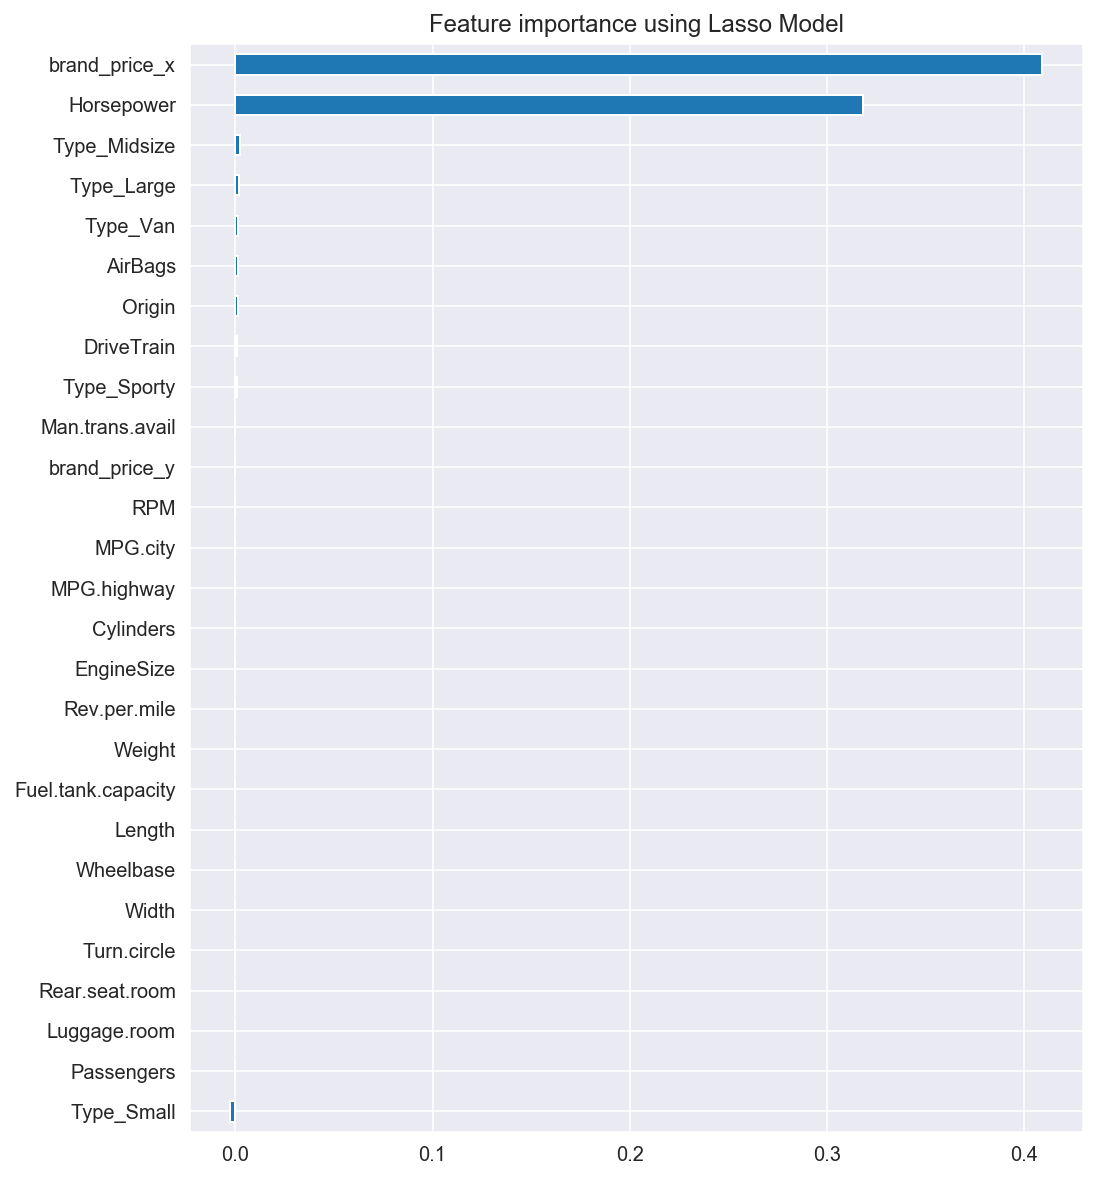

In [130]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [131]:
dforig=df2.copy()

### VIF

In [132]:
## Building of simple OLS model.
X = df2.drop('Price',1)
y = df2.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     32.99
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.85e-28
Time:                        00:23:42   Log-Likelihood:                -9.9589
No. Observations:                  93   AIC:                             73.92
Df Residuals:                      66   BIC:                             142.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2115      4.692      1.111      0.271      -4.157      14.580
brand_price_x          0.2716      0.034      7.963      0.000       0.204       0.340
brand_price_y          0.2716      0.034      7.963      0.000       0.204       0.340
MPG.city               0.0481      0.287      0.168      0.867      -0.525       0.621
MPG.highway           -0.0981      0.295     -0.333      0.740      -0.686       0.490
AirBags                0.2480      0.093      2.661      0.010       0.062       0.434
DriveTrain             0.1086      0.083      1.307      0.196      -0.057       0.275
Cylinders              0.3216      0.310      1.038      0.303      -0.297       0.940
EngineSize             0.1195      0.454      0.263      0.793      -0.787       1.026
Horsepower             0.1349      0.079      1.718      0.091      -0.022       0.292
RPM                    0.0047      0.022      0.213      0.832      -0.039       0.048
Rev.per.mile           0.0044      0.015      0.296      0.768      -0.025       0.034
Man.trans.avail        0.0328      0.135      0.244      0.808      -0.236       0.302
Fuel.tank.capacity     0.1199      0.255      0.471      0.639      -0.389       0.629
Passengers            -0.5439      0.399     -1.363      0.177      -1.341       0.253
Length                -0.0540      0.196     -0.276      0.784      -0.445       0.337
Wheelbase              0.1717      0.348      0.493      0.623      -0.523       0.866
Width                 -1.1074      0.585     -1.892      0.063      -2.276       0.061
Turn.circle           -0.1392      0.303     -0.459      0.648      -0.745       0.466
Rear.seat.room         0.3565      0.226      1.577      0.120      -0.095       0.808
Luggage.room           0.1133      0.158      0.716      0.476      -0.203       0.429
Weight                 0.0188      0.037      0.514      0.609      -0.054       0.092
Origin                 0.0954      0.105      0.909      0.367      -0.114       0.305
Type_Large             0.3599      0.232      1.551      0.126      -0.103       0.823
Type_Midsize           0.3805      0.144      2.634      0.010       0.092       0.669
Type_Small            -0.1913      0.178     -1.073      0.287      -0.547       0.165
Type_Sporty            0.3721      0.198      1.878      0.065      -0.023       0.768
Type_Van               0.4137      0.329      1.257      0.213      -0.244       1.071
==============================================================================
Omnibus:                       12.300   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.682
Skew:                           0.743   Prob(JB):                      0.00107
Kurtosis:                       4.151   Cond. No.                     

In [133]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[inf,
 1654.966611872282,
 2291.252415931065,
 5.542890679422479,
 2.2967162108964145,
 398.3619562462254,
 491.11728401400194,
 674.5454499150284,
 1777.0087911085784,
 438.3883006052403,
 5.65567171850796,
 952.2863079397684,
 734.2963711154426,
 5824.0965694539545,
 10843.514605093596,
 13155.94719895987,
 2963.8478333809694,
 1266.2084241531854,
 318.8418945661255,
 3721.5228887560393,
 4.700082743589662,
 4.750035219106387,
 3.976667555684411,
 6.30841748514669,
 5.3698101363405994,
 7.154520611190039]

In [134]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [135]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[inf, inf, 1654.966611872282, 2291.252415931065, 5.542890679422479, 2.2967162108964145, 398.3619562462254, 491.11728401400194, 674.5454499150284, 1777.0087911085784, 438.3883006052403, 5.65567171850796, 952.2863079397684, 734.2963711154426, 5824.0965694539545, 10843.514605093596, 13155.94719895987, 2963.8478333809694, 1266.2084241531854, 318.8418945661255, 3721.5228887560393, 4.700082743589662, 4.750035219106387, 3.976667555684411, 6.30841748514669, 5.3698101363405994, 7.154520611190039]
Max VIF is for variable no.:
0
Iteration no.
2
[79.94604108750819, 1654.966611872282, 2291.252415931065, 5.542890679422479, 2.2967162108964168, 398.3619562462254, 491.11728401400194, 674.5454499150284, 1777.0087911085784, 438.3883006052403, 5.655671718507963, 952.2863079397684, 734.2963711154426, 5824.0965694539545, 10843.514605093596, 13155.94719895987, 2963.8478333809694, 1266.2084241531854, 318.8418945661255, 3721.5228887560393, 4.700082743589662, 4.75003521910638, 3.976667555684411,

In [136]:
## includes only the relevant features
train_out.head()

,AirBags,DriveTrain,Man.trans.avail,Origin,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.414214,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.414214,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Regularization

### Ridge:

In [137]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [139]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [140]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [141]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [142]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [143]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9393298443364827
linear regression test score: 0.7482446967575471
ridge regression train score low alpha: 0.7524638310257477
ridge regression test score low alpha: 0.5650282868855582
ridge regression train score high alpha: 0.24220750408541702
ridge regression test score high alpha: 0.17054445485353342


### Lasso:

In [144]:
from sklearn.linear_model import Lasso


In [145]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [146]:
print("training score:"), train_score 
print("test score: "), test_score
print("number of features used: "), coeff_used

training score:
test score: 
number of features used: 


(None, 0)

In [147]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [148]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [149]:
print("training score for alpha=0.01:"), train_score001 
print("test score for alpha =0.01: "), test_score001
print("number of features used: for alpha =0.01:"), coeff_used001

training score for alpha=0.01:
test score for alpha =0.01: 
number of features used: for alpha =0.01:


(None, 0)

In [150]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [151]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [152]:
print("training score for alpha=0.0001:"), train_score00001 
print("test score for alpha =0.0001: "), test_score00001
print("number of features used: for alpha =0.0001:"), coeff_used00001

training score for alpha=0.0001:
test score for alpha =0.0001: 
number of features used: for alpha =0.0001:


(None, 7)

In [153]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [154]:
print("LR training score:"), lr_train_score 
print("LR test score: "), lr_test_score

LR training score:
LR test score: 


(None, 0.7482446967575471)

### Elastic Net

In [155]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [156]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [157]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00001358
Optimal l1_ratio: 0.900
Number of iterations 37


In [158]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=1.3579195358588862e-05, copy_X=True, fit_intercept=True,
           l1_ratio=0.9, max_iter=37, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [159]:
print(r2_score(y_train, model.predict(X_train))) # training data performance

0.921944005870095


In [160]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.8809919208268883
